In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='oil&gas_Miscellaneous')
df1

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,Miscellaneous,Adani Green Ene,Renewables,2023-12-20,1479.00,1526.90,1578.90,1460.00,2520173,-0.0265
1,Miscellaneous,Adani Green Ene,Renewables,2023-12-19,1519.30,1535.00,1555.90,1502.40,1631716,-0.0065
2,Miscellaneous,Adani Green Ene,Renewables,2023-12-18,1529.25,1397.10,1598.00,1396.00,5409627,0.0988
3,Miscellaneous,Adani Green Ene,Renewables,2023-12-15,1391.75,1381.00,1399.00,1370.00,551703,0.0086
4,Miscellaneous,Adani Green Ene,Renewables,2023-12-14,1379.95,1394.00,1400.90,1367.65,449212,-0.0026
...,...,...,...,...,...,...,...,...,...,...
14685,Oil & Gas,Oil India,Oil Exploration and Production,2019-07-01,174.60,175.40,175.90,172.50,1275303,0.0003
14686,Oil & Gas,Oil India,Oil Exploration and Production,2019-04-01,174.55,172.05,174.95,172.05,431122,0.0148
14687,Oil & Gas,Oil India,Oil Exploration and Production,2019-03-01,172.00,172.80,175.70,171.50,698190,-0.0023
14688,Oil & Gas,Oil India,Oil Exploration and Production,2019-02-01,172.40,175.80,176.20,171.00,722532,-0.0191


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14690 entries, 0 to 14689
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   14690 non-null  object        
 1   Company    14690 non-null  object        
 2   Industry   14690 non-null  object        
 3   DATE       14690 non-null  datetime64[ns]
 4   PRICE      14690 non-null  float64       
 5   OPEN       14690 non-null  float64       
 6   HIGH       14690 non-null  float64       
 7   LOW        14690 non-null  float64       
 8   VOLUME     14690 non-null  int64         
 9   CHANGE(%)  14690 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 1.1+ MB


In [5]:
df1.isnull().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

<Axes: >

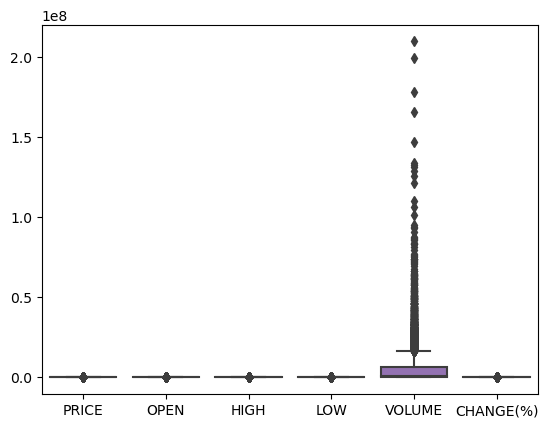

In [6]:
sns.boxplot(data=df1)

df1['DATE'] = pd.to_datetime(df1['DATE'])

# Correcting the incomplete line in the dataset
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Group by 'Company' and apply the remove_outliers function to numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df_outliers_removed = df1.groupby('Company')[numerical_columns].apply(lambda x: x.apply(remove_outliers))

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_outliers_removed)
plt.title('Boxplots of Numerical Columns After Removing Outliers by Company')
plt.show()

df1['DATE'] = pd.to_datetime(df1['DATE'])

df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(column):
    Q1, Q3 = column.quantile(q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(min(x, upper), lower))

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


In [7]:
df1.isna().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

In [8]:
df1.dropna(inplace=True)

In [9]:
df2=df1.copy()

df2 = df2.sort_values(by='DATE')

# Calculate daily returns for each stock
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return
14689,Oil & Gas,Oil India,Oil Exploration and Production,2019-01-01,175.75,175.0,176.40,174.15,381570,0.0054,NaN
9749,Oil & Gas,ONGC,Oil Exploration and Production,2019-01-01,148.50,150.0,150.10,148.00,4496586,-0.0093,NaN
1232,Miscellaneous,Adani Green Ene,Renewables,2019-01-01,276.30,279.3,279.30,273.25,13973,0.0002,NaN
2467,Miscellaneous,Info Edge,Misc. Commercial Services,2019-01-01,1439.00,1427.1,1457.45,1427.10,76834,-0.0011,NaN
6172,Miscellaneous,CDSL,Misc. Commercial Services,2019-01-01,227.15,224.6,228.10,222.55,212608,0.0170,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12220,Oil & Gas,HINDPETRO,Refineries,2023-12-22,369.30,375.6,375.60,364.00,8465677,-0.0170,-0.017035
6173,Miscellaneous,Indiamart Inter,Printing & Publishing,2023-12-22,2711.75,2763.0,2769.25,2696.05,142476,-0.0103,-0.010292
2468,Miscellaneous,CRISIL,Ratings,2023-12-22,4353.55,4280.0,4375.00,4265.05,30666,0.0188,0.018803
8515,Oil & Gas,ONGC,Oil Exploration and Production,2023-12-22,203.95,204.0,204.50,201.80,9910694,0.0064,0.006415


In [11]:

df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate additional features
df2['MA_10'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=10).mean())
df2['MA_50'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=30).mean())
df2.head(20)


,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
1232,Miscellaneous,Adani Green Ene,Renewables,2019-01-01,276.30,279.30,279.30,273.25,13973,0.0002,NaN,NaN,NaN
1209,Miscellaneous,Adani Green Ene,Renewables,2019-01-02,257.20,258.75,264.00,256.00,14481,-0.0033,-0.069128,NaN,NaN
1189,Miscellaneous,Adani Green Ene,Renewables,2019-01-03,286.85,304.00,307.00,285.20,238191,-0.0564,0.115280,NaN,NaN
1170,Miscellaneous,Adani Green Ene,Renewables,2019-01-04,283.15,285.00,287.10,282.55,27433,-0.0005,-0.012899,NaN,NaN
1110,Miscellaneous,Adani Green Ene,Renewables,2019-01-07,338.70,336.90,345.00,335.00,236517,-0.0031,0.196186,NaN,NaN
1087,Miscellaneous,Adani Green Ene,Renewables,2019-01-08,291.00,293.30,294.30,286.75,27338,-0.0102,-0.140833,NaN,NaN
1048,Miscellaneous,Adani Green Ene,Renewables,2019-01-10,290.05,294.25,307.00,286.65,83601,-0.0198,-0.003265,NaN,NaN
1028,Miscellaneous,Adani Green Ene,Renewables,2019-01-11,331.55,328.00,343.10,326.95,82636,0.0097,0.143079,NaN,NaN
1223,Miscellaneous,Adani Green Ene,Renewables,2019-01-14,279.15,288.00,288.00,277.00,9248,-0.0233,-0.158046,NaN,NaN
1222,Miscellaneous,Adani Green Ene,Renewables,2019-01-15,280.95,280.00,284.50,278.25,7810,0.0064,0.006448,291.490,NaN


In [12]:
df2.tail(10)

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
7349,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-09,2438.85,2483.00,2483.00,2435.95,8127833,-0.0144,-0.029402,2340.303,2346.577667
7329,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-10,2349.40,2343.85,2359.35,2338.15,6277225,0.0019,-0.036677,2335.853,2350.674333
7308,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-11,2330.65,2326.05,2332.00,2322.50,709922,0.0068,-0.007981,2329.478,2352.836000
7288,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-12,2424.05,2460.00,2464.95,2420.15,4598562,-0.0144,0.040075,2331.813,2356.554333
7287,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-13,2433.95,2422.00,2438.35,2406.30,5015591,0.0041,0.004084,2337.463,2361.422667
7286,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-14,2464.15,2454.00,2474.95,2442.65,8486177,0.0124,0.012408,2359.491,2367.114667
7285,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-15,2495.60,2478.00,2500.00,2470.05,7966076,0.0128,0.012763,2396.008,2379.598667
7284,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-18,2521.00,2495.60,2534.90,2490.95,7082594,0.0102,0.010178,2422.564,2388.573000
7283,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-19,2558.10,2555.00,2573.90,2525.20,8410302,0.0147,0.014716,2452.848,2390.177667
7282,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-20,2527.15,2571.05,2598.85,2520.00,8868361,-0.0121,-0.012099,2454.290,2389.511000


In [13]:
# Calculate volatility (using a rolling standard deviation for the last 10 days)
df2['Volatility'] = df2.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=10).std())
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility
1232,Miscellaneous,Adani Green Ene,Renewables,2019-01-01,276.30,279.30,279.30,273.25,13973,0.0002,NaN,NaN,NaN,NaN
1209,Miscellaneous,Adani Green Ene,Renewables,2019-01-02,257.20,258.75,264.00,256.00,14481,-0.0033,-0.069128,NaN,NaN,NaN
1189,Miscellaneous,Adani Green Ene,Renewables,2019-01-03,286.85,304.00,307.00,285.20,238191,-0.0564,0.115280,NaN,NaN,NaN
1170,Miscellaneous,Adani Green Ene,Renewables,2019-01-04,283.15,285.00,287.10,282.55,27433,-0.0005,-0.012899,NaN,NaN,NaN
1110,Miscellaneous,Adani Green Ene,Renewables,2019-01-07,338.70,336.90,345.00,335.00,236517,-0.0031,0.196186,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7286,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-14,2464.15,2454.00,2474.95,2442.65,8486177,0.0124,0.012408,2359.491,2367.114667,0.049426
7285,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-15,2495.60,2478.00,2500.00,2470.05,7966076,0.0128,0.012763,2396.008,2379.598667,0.044555
7284,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-18,2521.00,2495.60,2534.90,2490.95,7082594,0.0102,0.010178,2422.564,2388.573000,0.042060
7283,Oil & Gas,Reliance,Oil Exploration and Production,2023-12-19,2558.10,2555.00,2573.90,2525.20,8410302,0.0147,0.014716,2452.848,2390.177667,0.041849


In [14]:
summary_stats = df2.groupby(['Company']).describe()
summary_stats
# Display the summary statistics

PRICE                                                        \
                  count         mean          std      min       25%      50%   
Company                                                                         
Adani Green Ene  1233.0   548.501054   316.282232   158.10   301.550   383.55   
BPCL             1235.0   385.689028    54.873389   262.85   344.575   375.60   
Bharat Dynamics  1235.0   550.132996   318.615599   158.10   301.675   383.65   
CDSL             1235.0   817.593320   500.093944   185.70   253.225   972.95   
CRISIL           1235.0  2475.972794   897.740949  1144.90  1648.875  2573.90   
HINDPETRO        1235.0   253.814372    39.007703   164.05   226.525   249.95   
IOC              1235.0    78.445012    15.273431    47.70    68.090    78.33   
Indiamart Inter  1109.0  2436.447106  1028.921667   566.30  1542.580  2423.00   
Info Edge        1235.0  3781.602308  1240.668175  1430.45  2618.900  3884.40   
ONGC             1235.0   133.452874    33.866347    60.00   112.725   138.65   
Oil India        1235.0   182.064089    62.929154    70.35   131.500   178.00   
Reliance         1233.0  1870.557924   475.519293   795.06  1379.000  1989.17   

                                      OPEN               ...        MA_50  \
                      75%      max   count         mean  ...          75%   
Company                                                  ...                
Adani Green Ene   852.600  1529.25  1233.0   549.020884  ...   799.118333   
BPCL              420.250   544.60  1235.0   386.290607  ...   421.487083   
Bharat Dynamics   854.250  1571.25  1235.0   550.562227  ...   800.272083   
CDSL             1225.550  1954.80  1235.0   818.612794  ...  1216.491667   
CRISIL           3197.800  4383.55  1235.0  2479.532510  ...  3171.515417   
HINDPETRO         281.475   384.25  1235.0   254.219433  ...   275.130833   
IOC                89.240   124.70  1235.0    78.594955  ...    89.467167   
Indiamart Inter  3134.200  4890.45  1109.0  2441.872561  ...  2939.702667   
Info Edge        4601.725  7019.50  1235.0  3785.832874  ...  4510.662083   
ONGC              158.700   203.95  1235.0   133.663441  ...   156.225833   
Oil India         230.000   376.35  1235.0   182.369231  ...   222.520833   
Reliance         2278.230  2619.85  1233.0  1872.258297  ...  2267.608000   

                             Volatility                                \
                         max      count      mean       std       min   
Company                                                                 
Adani Green Ene  1186.408333     1223.0  0.107867  0.082241  0.007781   
BPCL              480.828333     1225.0  0.078982  0.049101  0.006225   
Bharat Dynamics  1216.615000     1225.0  0.107843  0.082176  0.007781   
CDSL             1678.675000     1225.0  0.113914  0.076284  0.003593   
CRISIL           4118.435000     1225.0  0.079975  0.044055  0.004273   
HINDPETRO         322.740000     1225.0  0.087970  0.046748  0.007859   
IOC               105.901667     1225.0  0.077681  0.048891  0.006122   
Indiamart Inter  4186.116333     1099.0  0.121518  0.092445  0.006685   
Info Edge        6335.196667     1225.0  0.088607  0.046684  0.006900   
ONGC              189.348333     1225.0  0.091518  0.059527  0.005241   
Oil India         307.148333     1225.0  0.098995  0.067343  0.005756   
Reliance         2474.819667     1223.0  0.069698  0.045862  0.005685   

                                                         
                      25%       50%       75%       max  
Company                                                  
Adani Green Ene  0.048590  0.082670  0.136373  0.344040  
BPCL             0.040197  0.070122  0.111788  0.209276  
Bharat Dynamics  0.048628  0.082813  0.136178  0.344040  
CDSL             0.051064  0.097835  0.168776  0.321501  
CRISIL           0.044622  0.081719  0.109605  0.204340  
HINDPETRO        0.049604  0.089399  0.118522  0.219163  
IOC              0.040105  0

Text(0.5, 1.0, 'Distribution of Daily Returns')

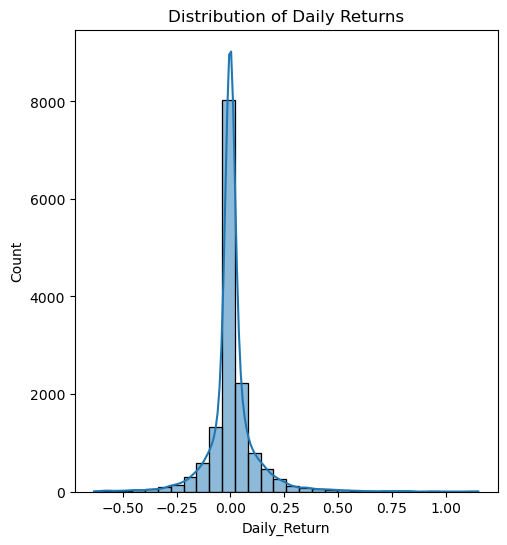

In [15]:
df2 = df2.sort_values(by=['Company', 'DATE'])

# Plot histograms for returns and trading volumes
plt.figure(figsize=(12, 6))

# Histogram for Daily Returns
plt.subplot(1, 2, 1)
sns.histplot(df2['Daily_Return'], bins=30, kde=True)
plt.title('Distribution of Daily Returns')

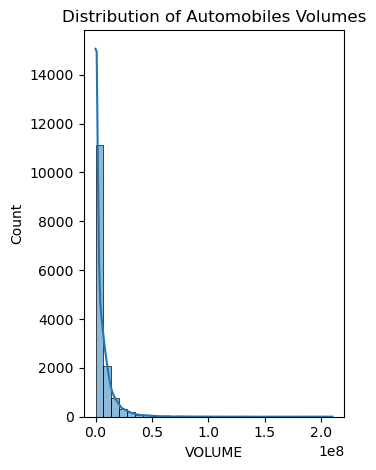

In [16]:
# Histogram for Trading Volumes
plt.subplot(1, 2, 2)
sns.histplot(df2['VOLUME'], bins=30, kde=True)
plt.title('Distribution of Automobiles Volumes')

plt.tight_layout()
plt.show()

In [17]:
correlation_matrix = df2.groupby('Company')[['Daily_Return', 'VOLUME']].corr()
correlation_matrix

Daily_Return    VOLUME
Company                                             
Adani Green Ene Daily_Return      1.000000  0.358612
                VOLUME            0.358612  1.000000
BPCL            Daily_Return      1.000000  0.124285
                VOLUME            0.124285  1.000000
Bharat Dynamics Daily_Return      1.000000  0.358676
                VOLUME            0.358676  1.000000
CDSL            Daily_Return      1.000000  0.190017
                VOLUME            0.190017  1.000000
CRISIL          Daily_Return      1.000000  0.095609
                VOLUME            0.095609  1.000000
HINDPETRO       Daily_Return      1.000000  0.178586
                VOLUME            0.178586  1.000000
IOC             Daily_Return      1.000000  0.084838
                VOLUME            0.084838  1.000000
Indiamart Inter Daily_Return      1.000000  0.117443
                VOLUME            0.117443  1.000000
Info Edge       Daily_Return      1.000000  0.039709
                VOLUME            0.039709  1.000000
ONGC            Daily_Return      1.000000  0.053537
                VOLUME            0.053537  1.000000
Oil India       Daily_Return      1.000000  0.033524
                VOLUME            0.033524  1.000000
Reliance        Daily_Return      1.000000  0.048547
                VOLUME            0.048547  1.000000

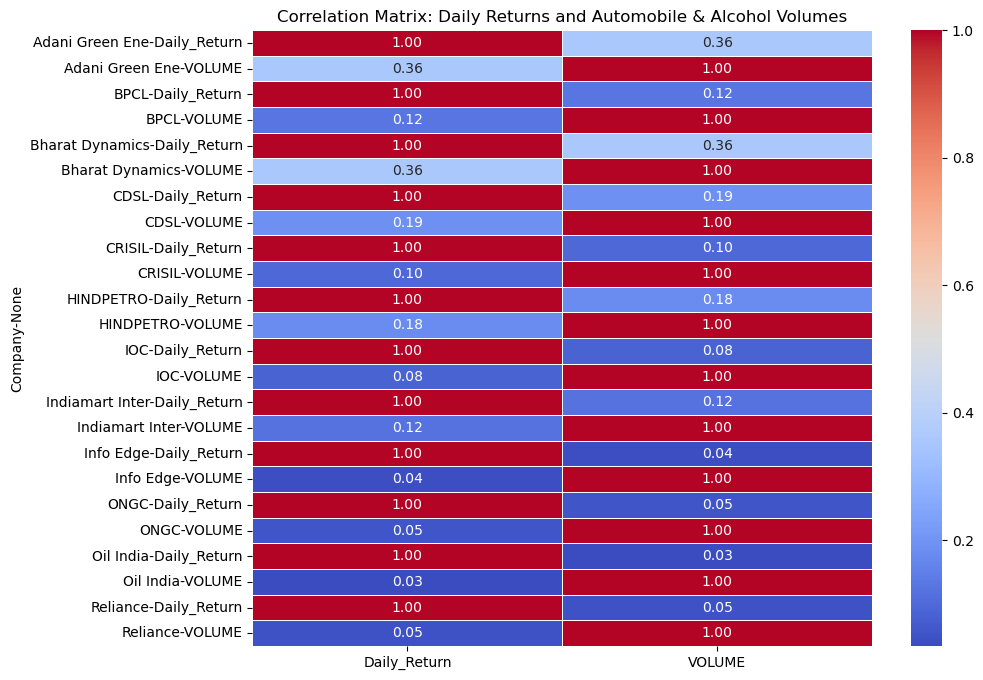

In [18]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns and Automobile & Alcohol Volumes')
plt.show()

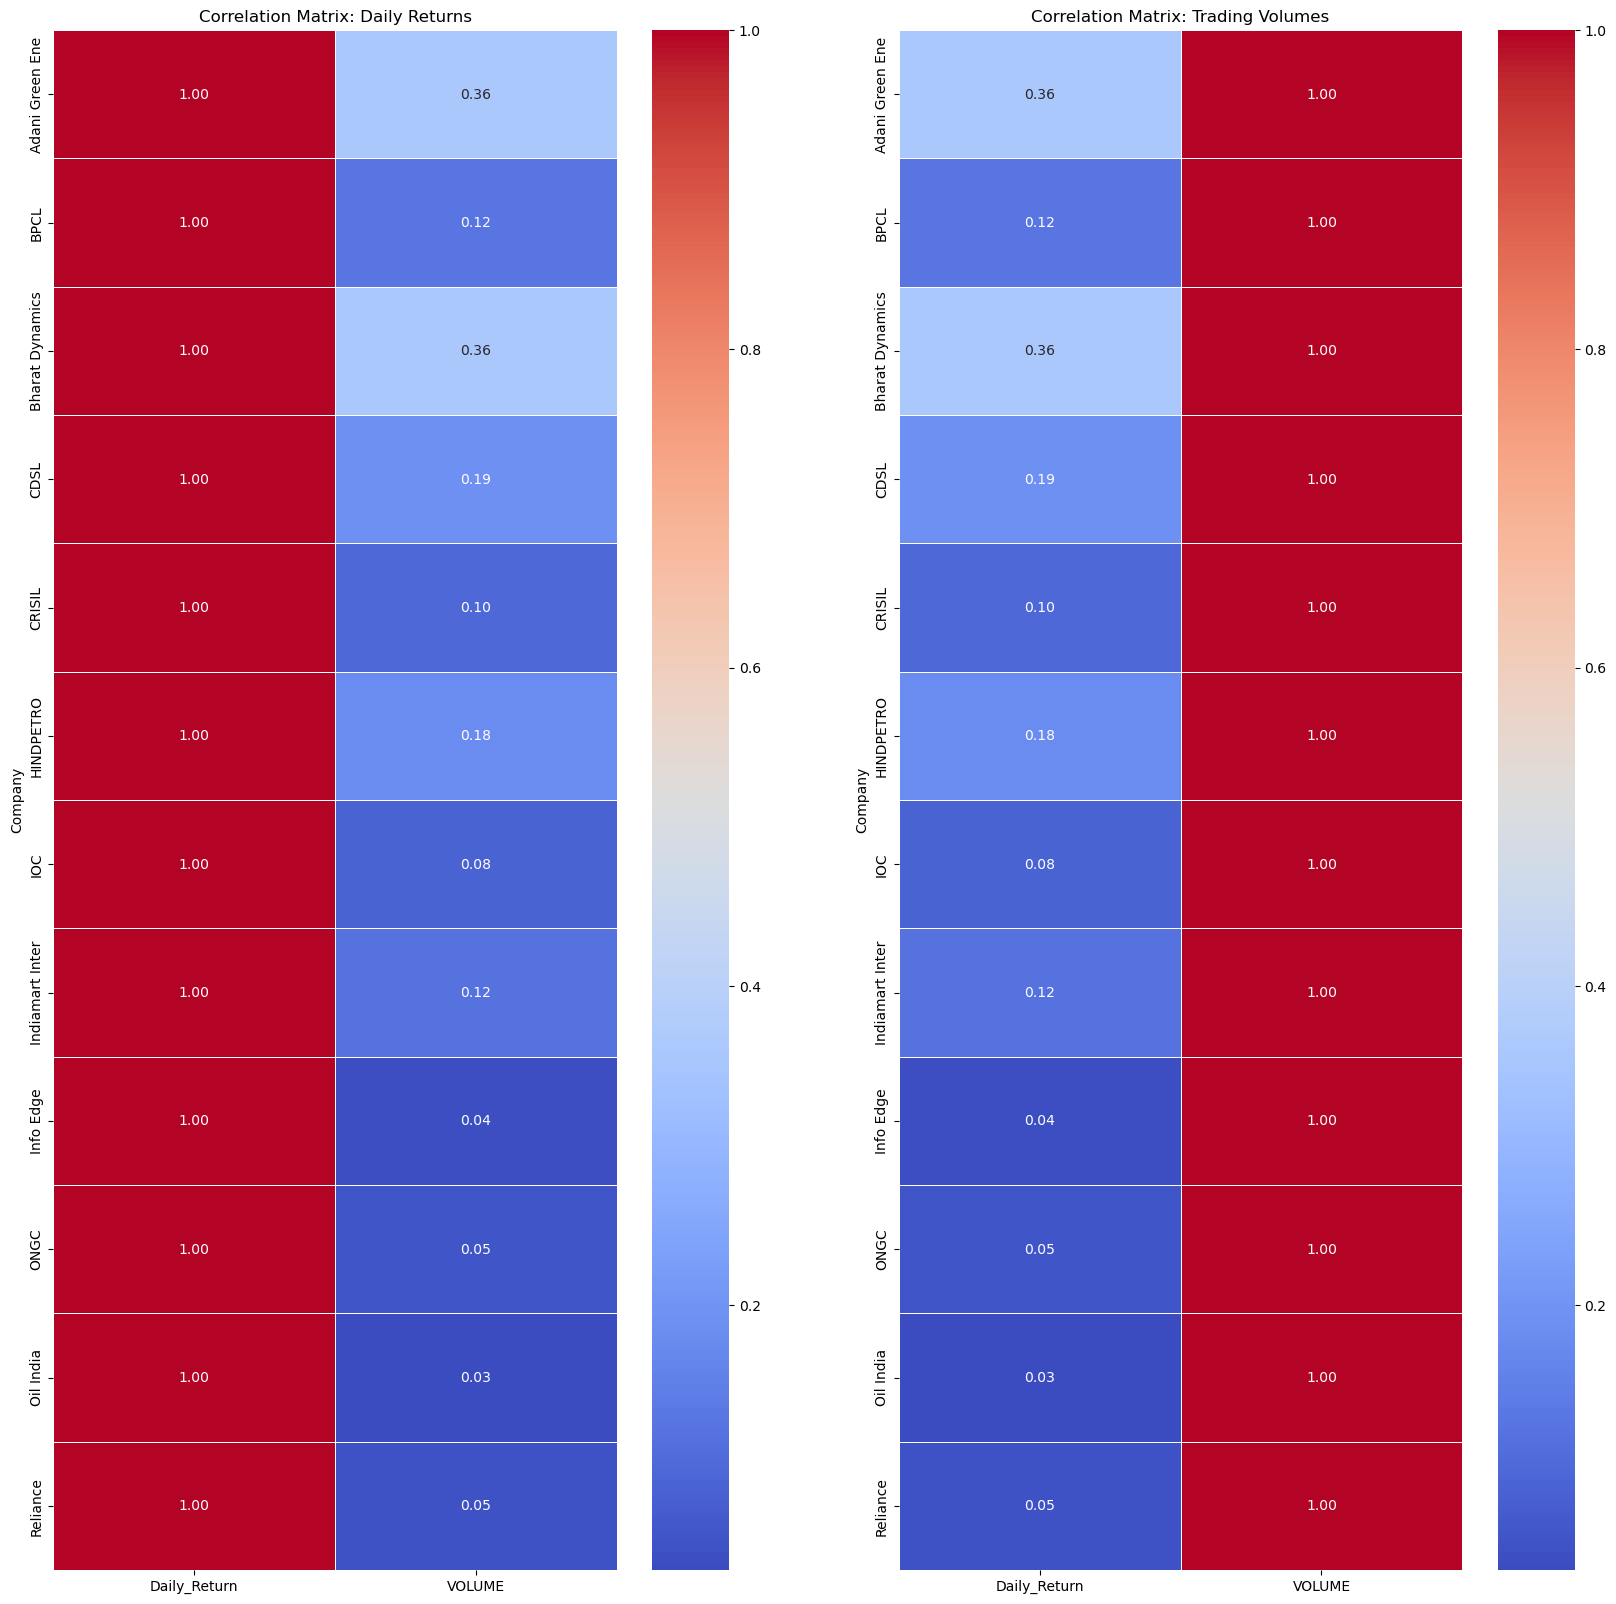

In [19]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Sort the DataFrame by 'DATE' in ascending order
df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate the correlation matrix
correlation_matrix = df2.groupby(['Company'])[['Daily_Return', 'VOLUME']].corr().unstack()

# Visualize the correlation matrices
plt.figure(figsize=(20, 20))

# Correlation matrix for Daily Returns
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix['Daily_Return'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns')

# Correlation matrix for Trading Volumes
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix['VOLUME'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Trading Volumes')

#plt.tight_layout()
plt.show()


In [20]:
grouped_df = df2.groupby('Company')
grouped_df['Daily_Return'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
Adani Green Ene,1232.0,0.009642,0.131193,-0.572888,-0.022726,0.000892,0.034063,0.933063
BPCL,1234.0,0.004065,0.089727,-0.359476,-0.020805,-0.001123,0.021908,0.509940
Bharat Dynamics,1234.0,0.009677,0.131090,-0.572888,-0.022639,0.000914,0.034409,0.933063
CDSL,1234.0,0.011914,0.133597,-0.634049,-0.017369,0.000717,0.035324,0.758414
CRISIL,1234.0,0.004727,0.088092,-0.380063,-0.016470,0.000712,0.022520,0.477164
HINDPETRO,1234.0,0.004724,0.095912,-0.402390,-0.023814,0.000208,0.024252,0.509709
IOC,1234.0,0.003972,0.088212,-0.340537,-0.020591,0.000000,0.017913,0.697382
Indiamart Inter,1108.0,0.012116,0.150152,-0.599464,-0.023922,0.000476,0.029528,1.151833
Info Edge,1234.0,0.005822,0.096932,-0.489778,-0.022499,0.001346,0.033319,0.499056


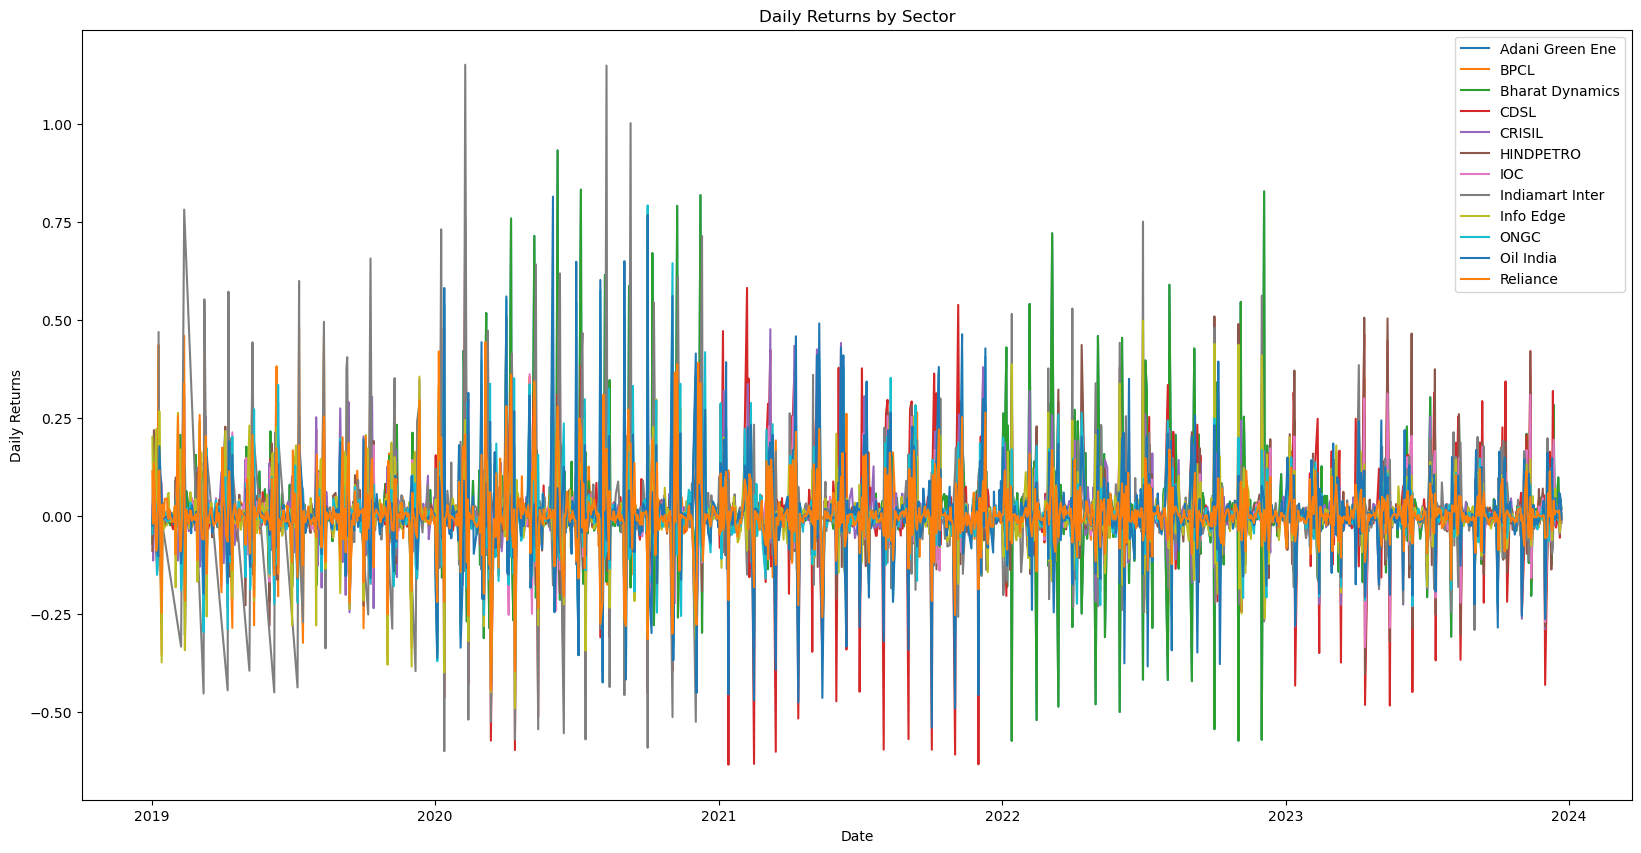

In [21]:
# Example: Line chart
plt.figure(figsize=(20, 10))
for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name)

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


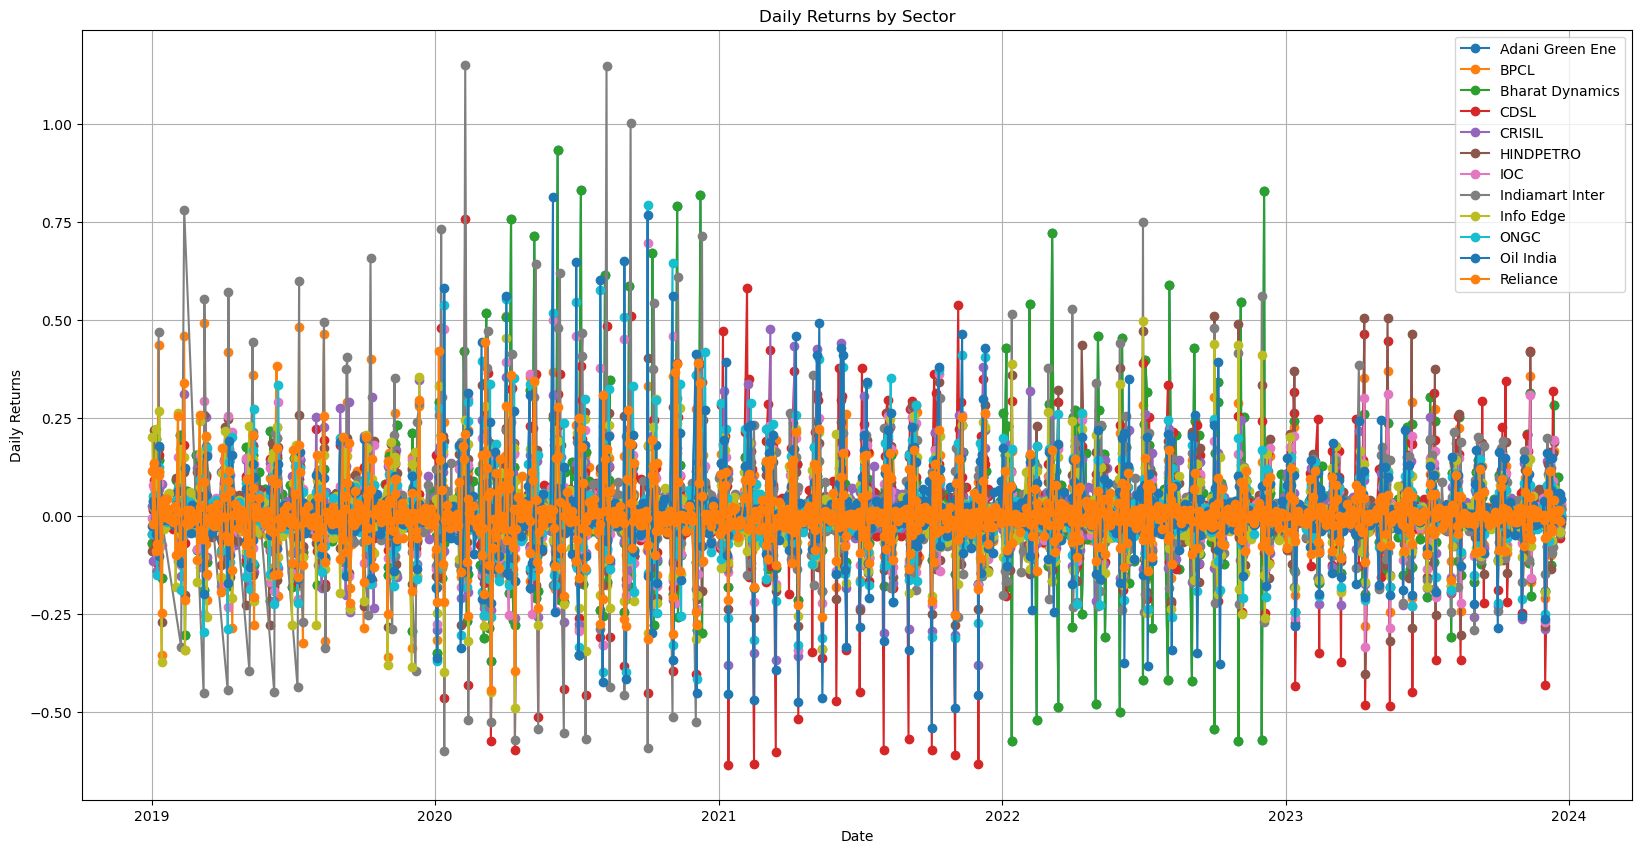

In [22]:


plt.figure(figsize=(20, 10))

for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


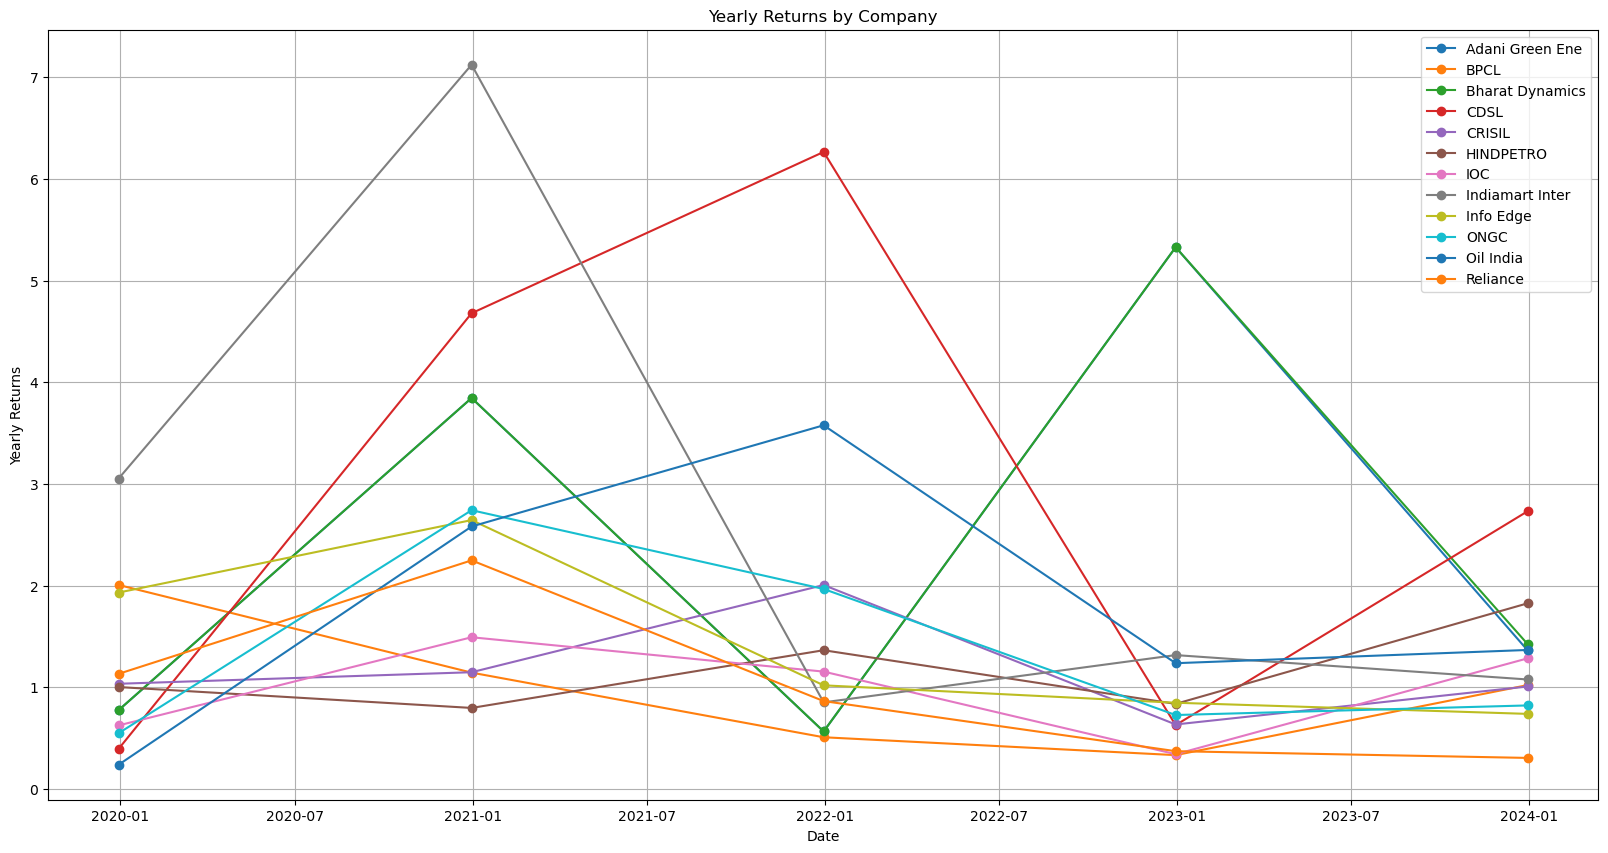

In [23]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate yearly returns
df2_yearly = df2.set_index('DATE').groupby(['Company', pd.Grouper(freq='Y')])['Daily_Return'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

for name, group in df2_yearly.groupby('Company'):
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Yearly Returns by Company')
plt.xlabel('Date')
plt.ylabel('Yearly Returns')
plt.legend()
plt.grid(True)
plt.show()


D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


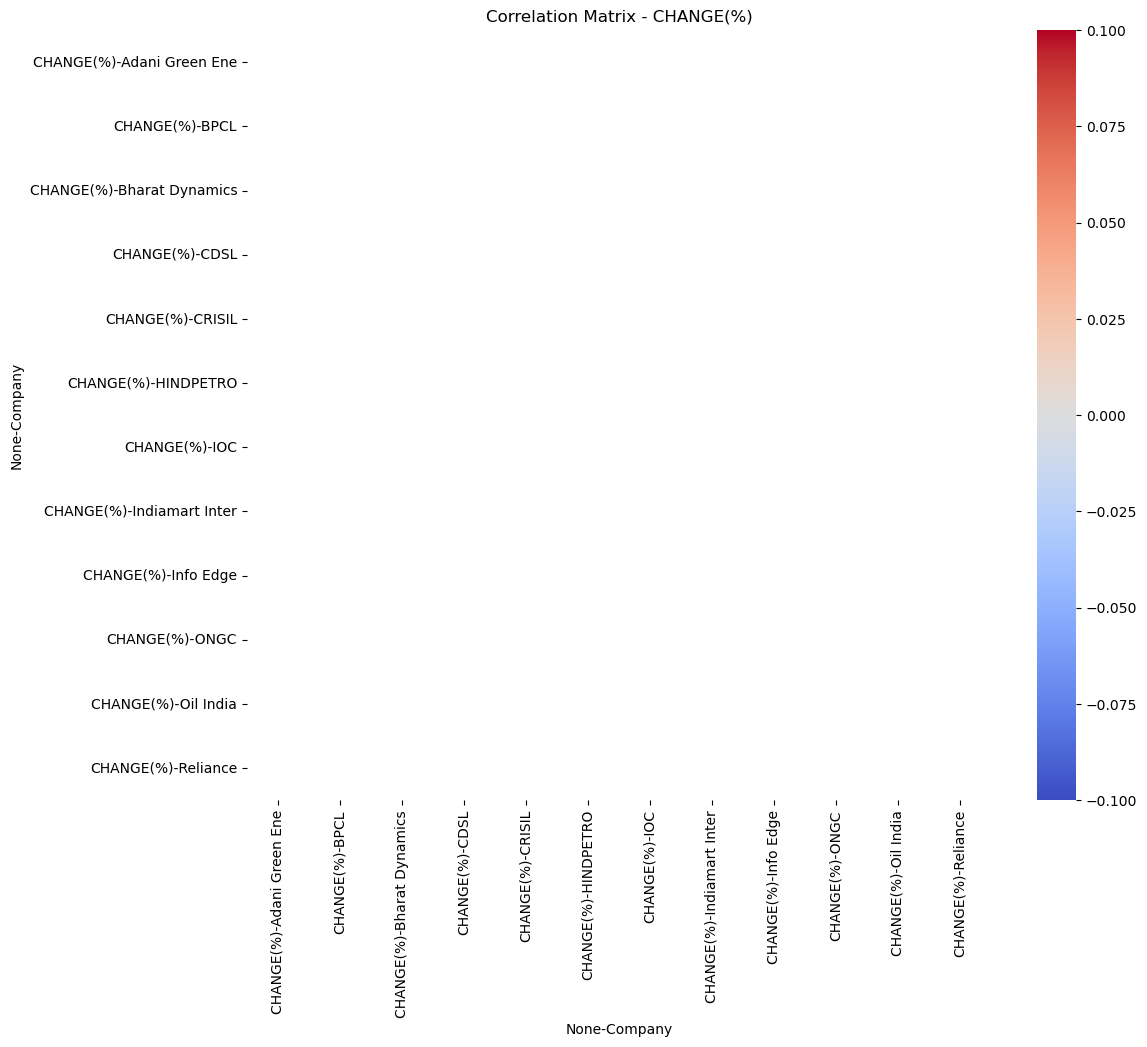

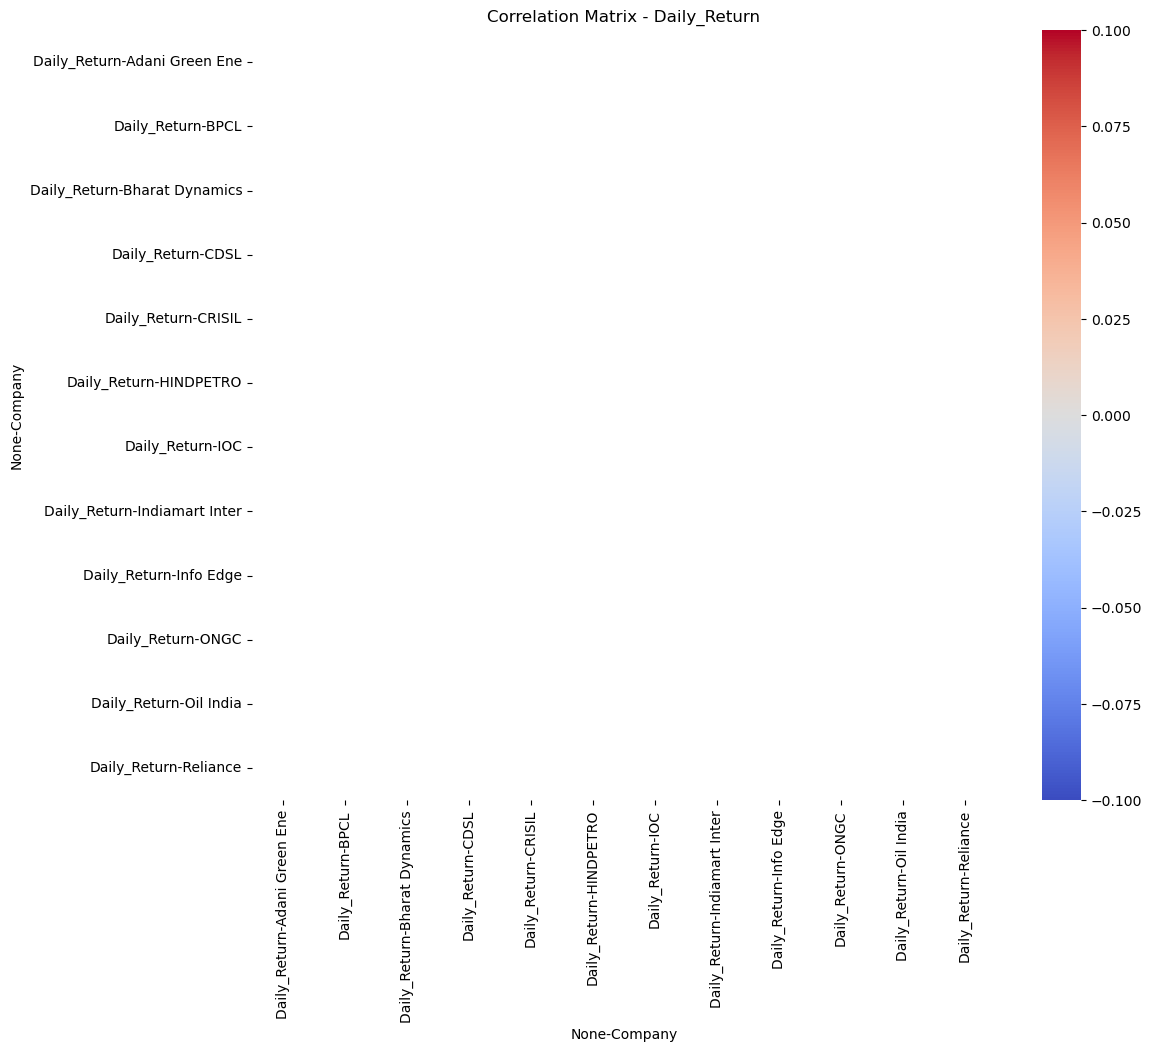

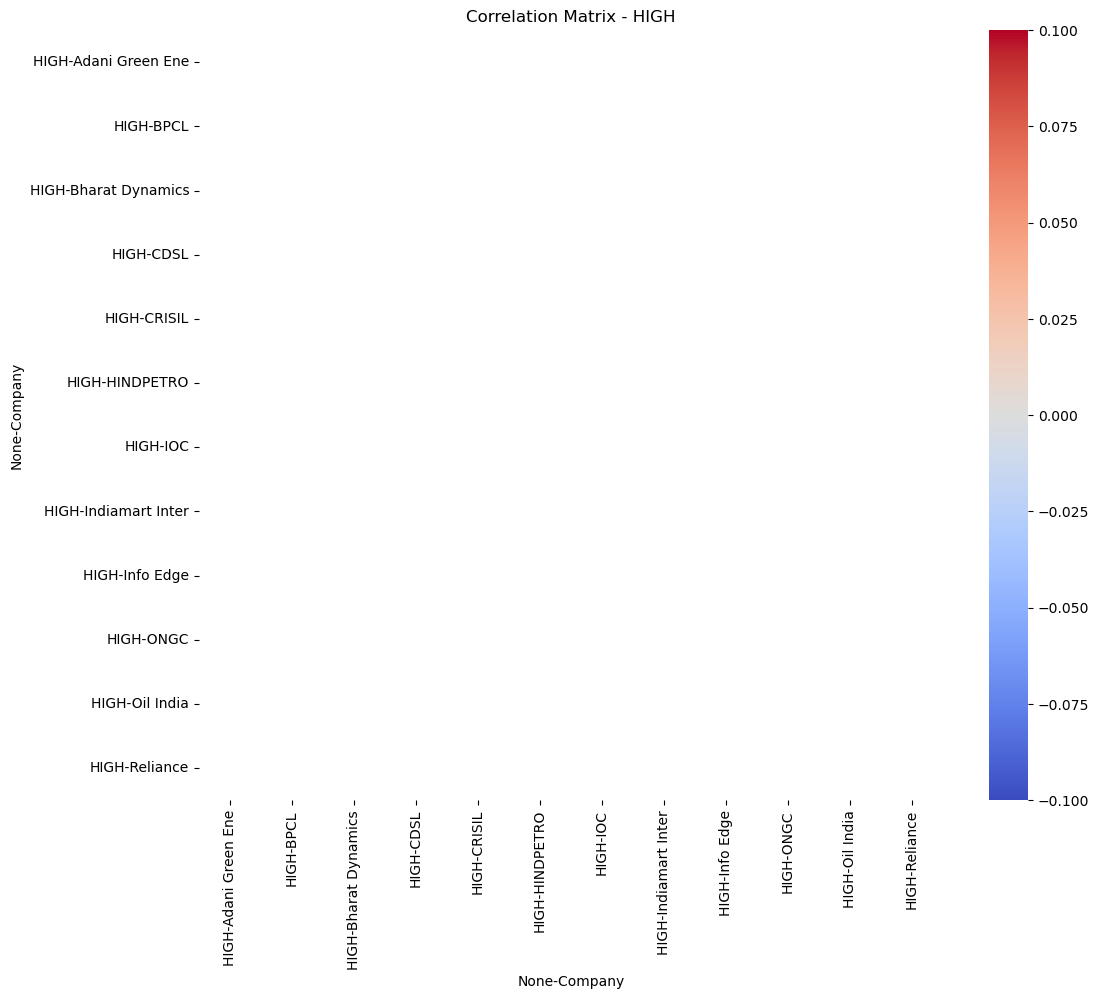

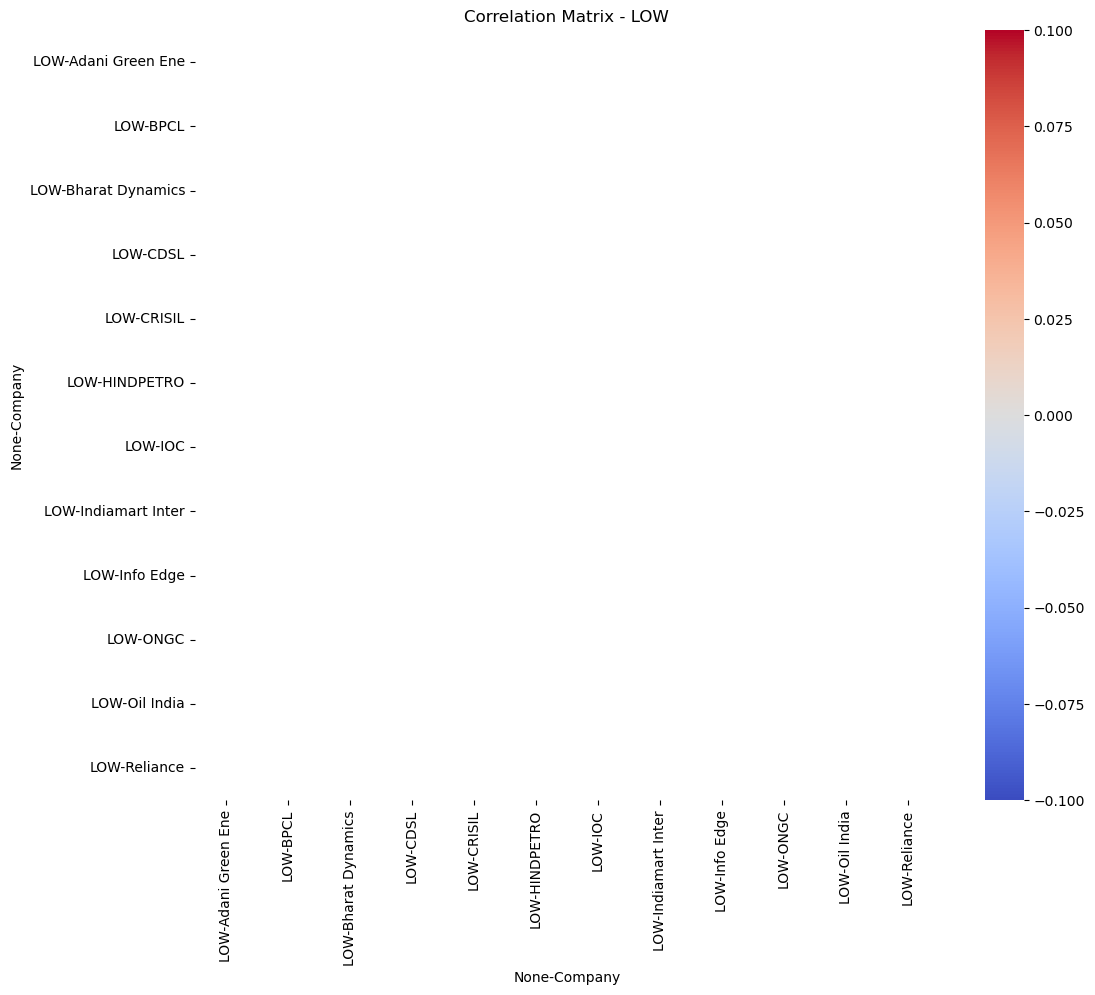

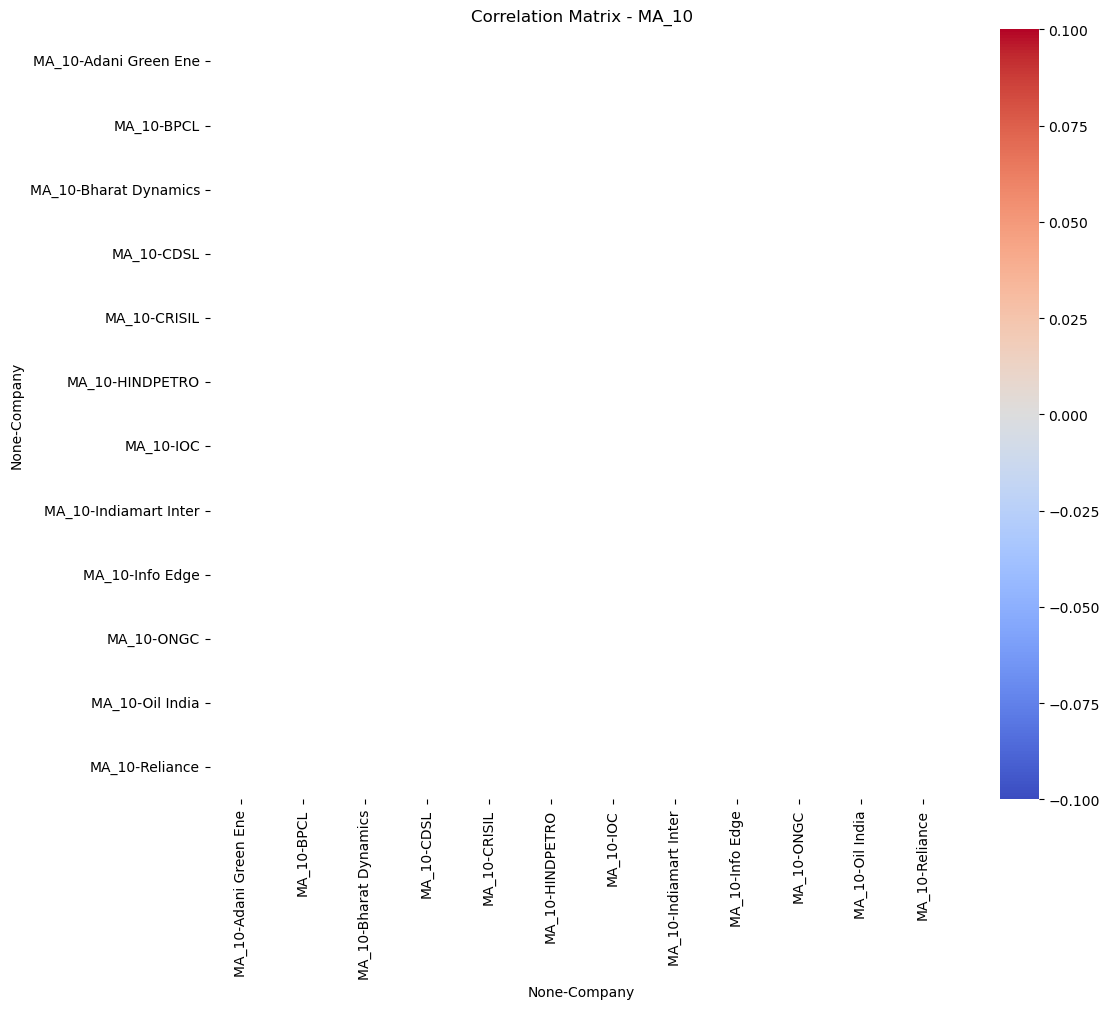

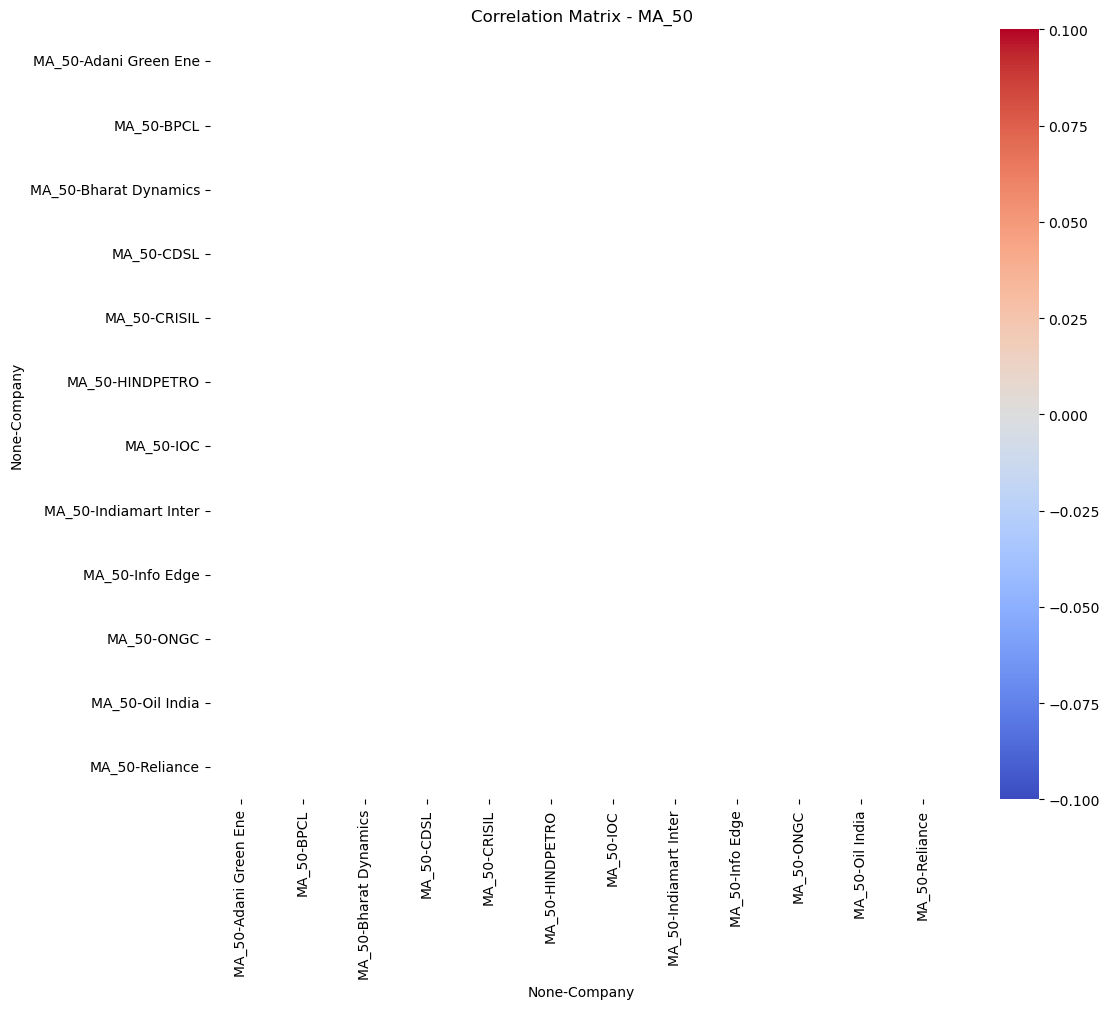

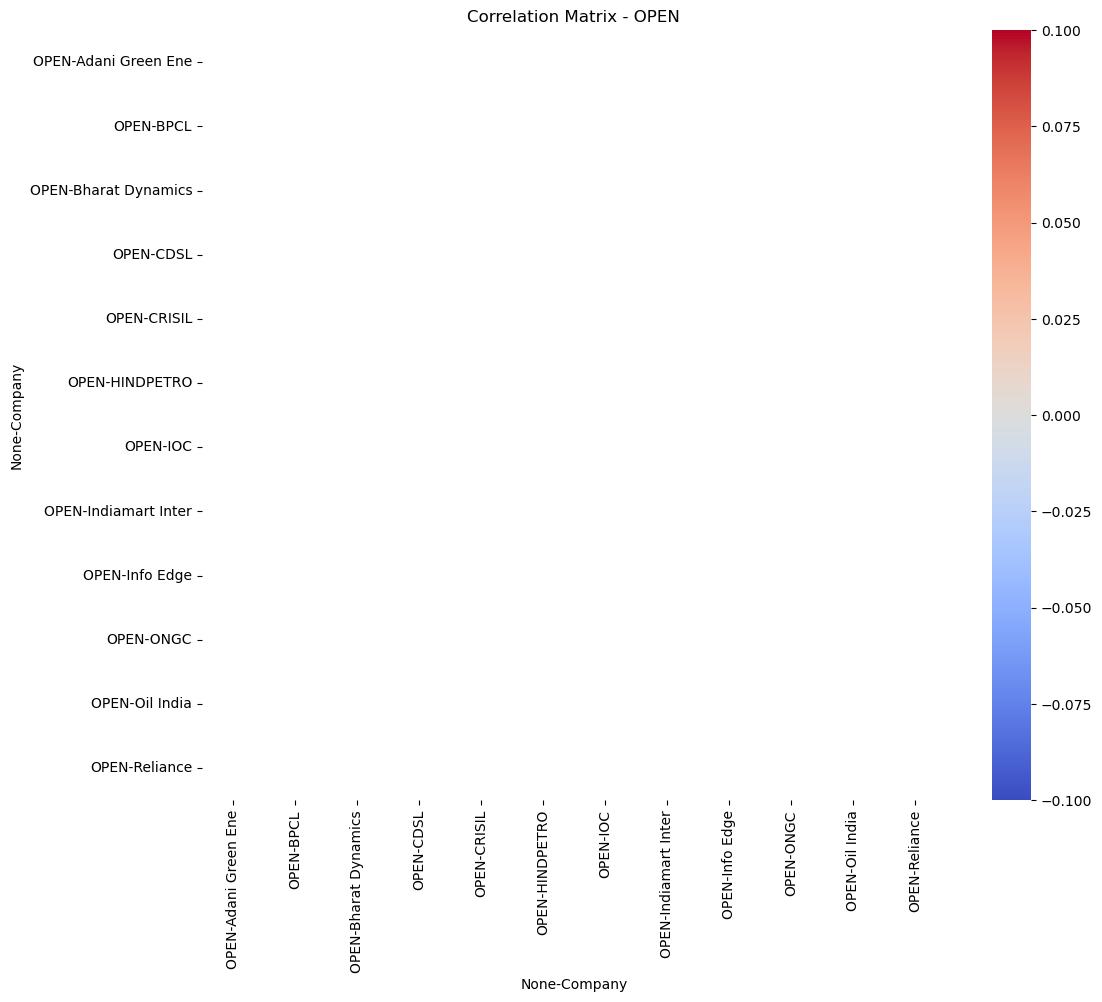

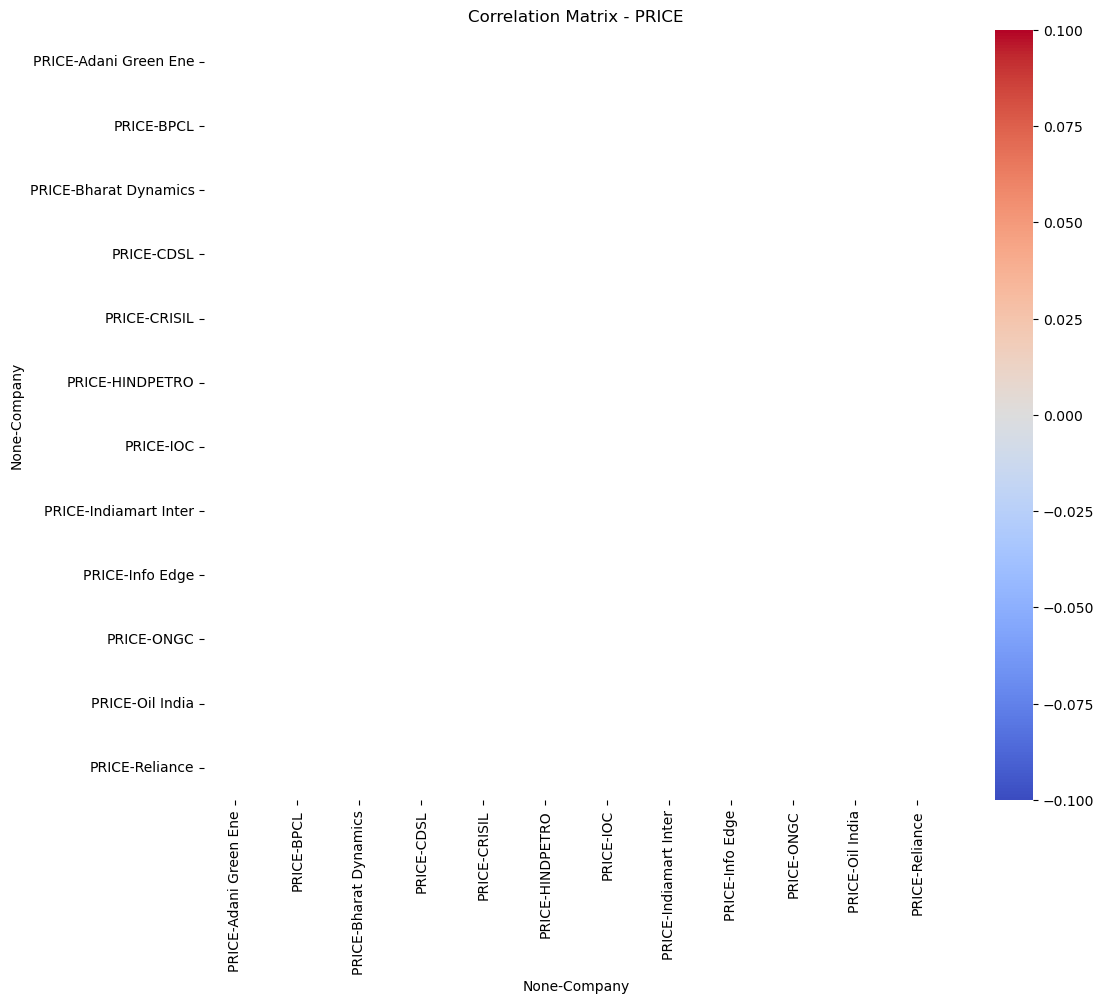

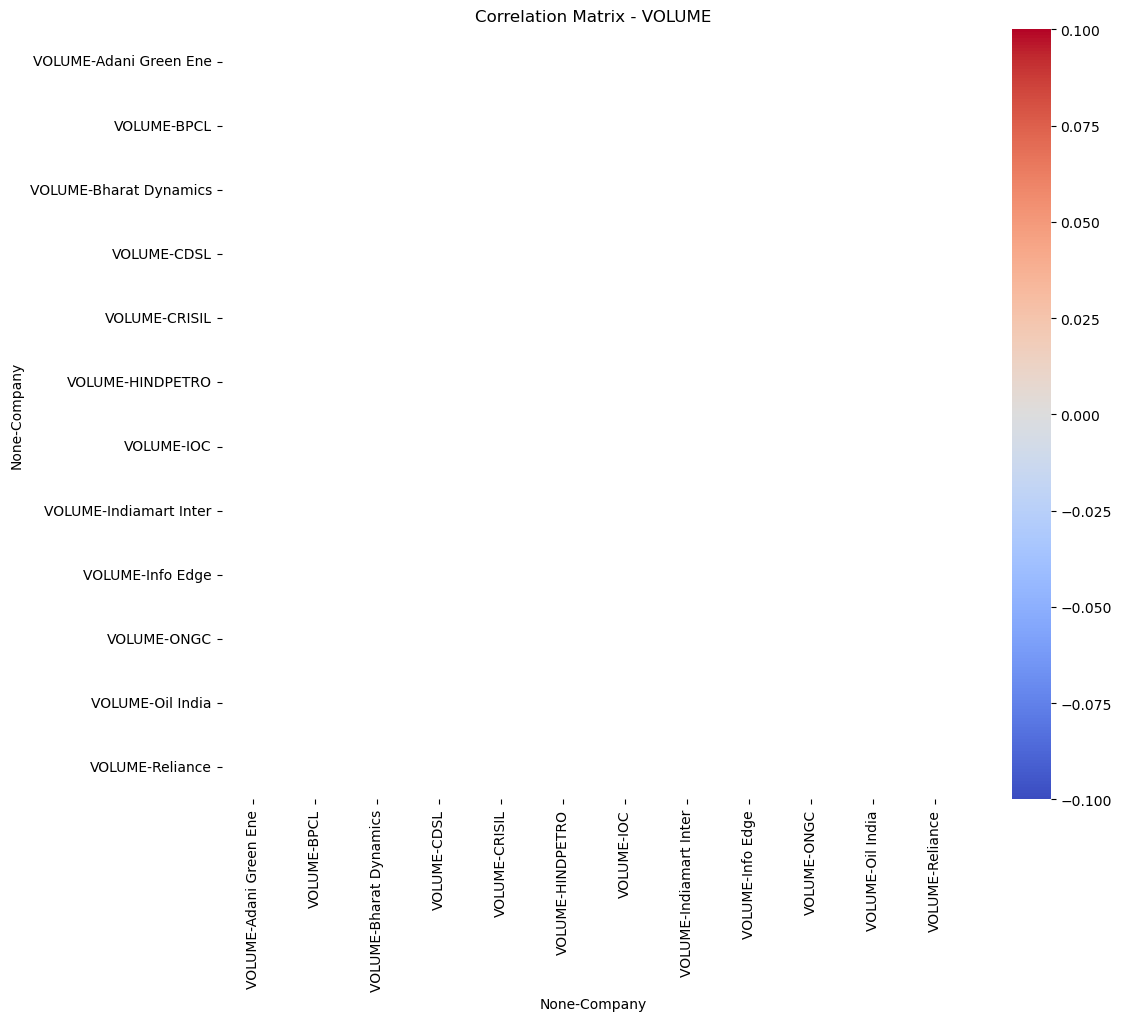

In [24]:

columns_of_interest = ['PRICE', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CHANGE(%)', 'Daily_Return', 'MA_10', 'MA_50', 'Category','Company']

# Select relevant columns from the DataFrame
df_subset = df2[columns_of_interest]

# Create a pivot table to separate the data by 'Category'
pivot_table = df_subset.pivot_table(index='Category', columns='Company', values=columns_of_interest[:-1], aggfunc='mean')

# Calculate correlation matrix for each 'Category'
correlation_matrices = {}
for category, data in pivot_table.groupby(level=0, axis=1):
    correlation_matrices[category] = data.corr()

# Plot correlation matrices
for category, matrix in correlation_matrices.items():
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix - {category}')
    plt.show()


In [25]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])

Laggards within Each Category:
                          Category    Company  Cumulative_Return
Category                                                        
Miscellaneous 3557   Miscellaneous     CRISIL          -0.231736
Oil & Gas     14380      Oil & Gas  Oil India          -0.312565


In [25]:
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility,Cumulative_Return
11106,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-01,2726.65,2735.00,2743.40,2705.00,304150.0,0.0024,NaN,NaN,NaN,NaN,NaN
11105,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-02,2692.00,2720.00,2747.25,2677.00,599274.0,-0.0127,-0.012708,NaN,NaN,NaN,-0.012708
11104,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-03,2701.35,2690.10,2723.85,2682.10,310511.0,0.0035,0.003473,NaN,NaN,NaN,-0.009235
11103,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-04,2734.20,2714.00,2742.00,2702.10,362393.0,0.0122,0.012161,NaN,NaN,NaN,0.002926
11102,Automobile & Ancillaries,Bajaj Auto Ltd,Automobile - 2 & 3 Wheelers,2019-01-07,2658.55,2739.90,2740.00,2645.00,462215.0,-0.0277,-0.027668,NaN,NaN,NaN,-0.024742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-14,1084.80,1083.85,1089.90,1076.55,2077791.0,0.0114,0.011374,972.185,993.423333,0.062647,4.435786
3,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-15,1083.25,1092.00,1095.00,1078.05,1322021.0,-0.0014,-0.001429,1003.895,1004.573333,0.044008,4.434357
2,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-18,1105.15,1079.30,1115.75,1061.30,1780071.0,0.0202,0.020217,1034.855,1014.883333,0.044276,4.454574
1,Alcohol,United Spirits Ltd,Breweries & Distilleries,2023-12-19,1086.25,1111.00,1112.95,1083.05,1062384.0,-0.0171,-0.017102,1055.405,1020.246667,0.038629,4.437473


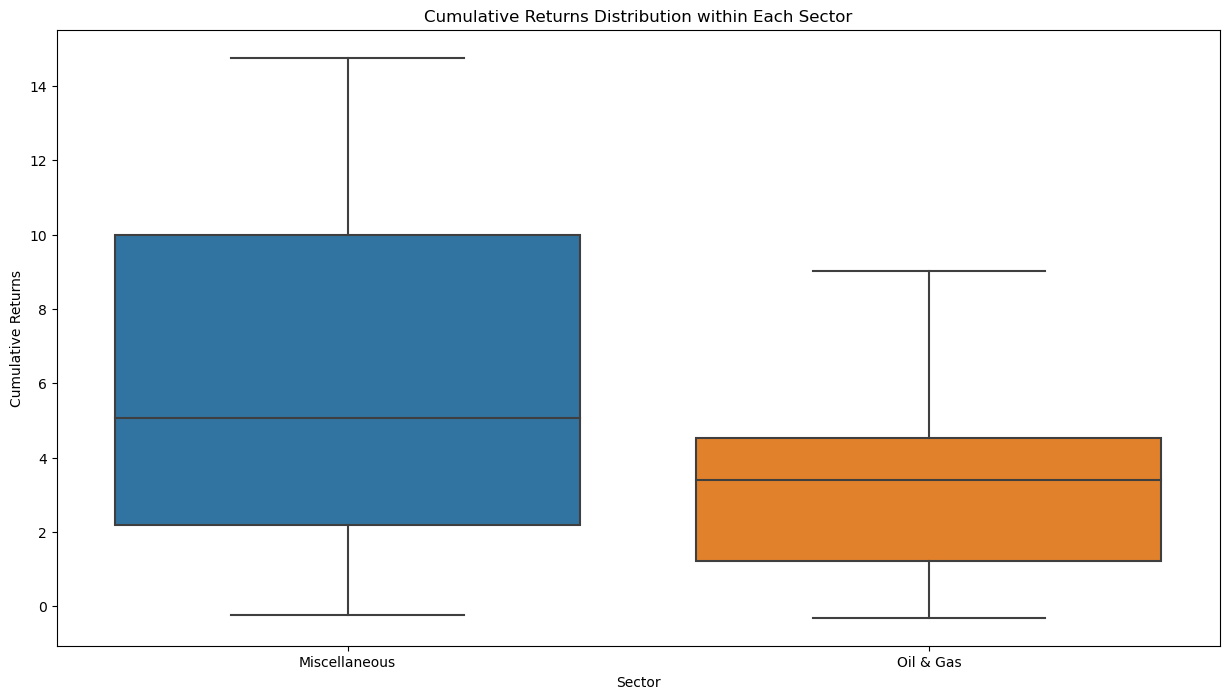

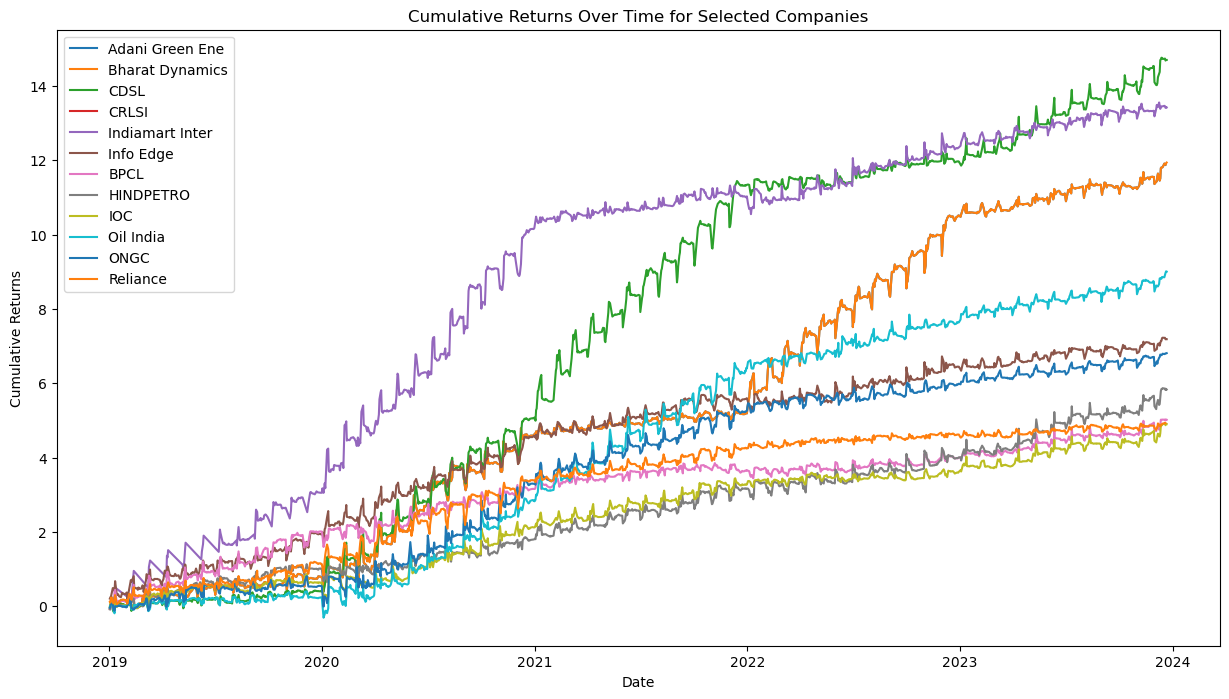

Statistical Summary of Cumulative Returns within Each Sector:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Miscellaneous,7276.0,5.798681,4.119588,-0.231736,2.173398,5.052365,10.000919,14.762051
Oil & Gas,7402.0,3.188708,2.121175,-0.312565,1.206062,3.392639,4.520331,9.012326


In [26]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Cumulative_Return', data=df2)
plt.title('Cumulative Returns Distribution within Each Sector')
plt.xlabel('Sector')
plt.ylabel('Cumulative Returns')
plt.show()

# Line chart to compare Cumulative Returns over time for select companies
selected_companies = ['Adani Green Ene','Bharat Dynamics','CDSL','CRLSI','Indiamart Inter','Info Edge','BPCL','HINDPETRO','IOC','Oil India','ONGC','Reliance']  # Replace with actual company names
plt.figure(figsize=(15, 8))
for company in selected_companies:
    company_data = df2[df2['Company'] == company]
    plt.plot(company_data['DATE'], company_data['Cumulative_Return'], label=company)

plt.title('Cumulative Returns Over Time for Selected Companies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Statistical summary to compare mean, median, etc. of Cumulative Returns within each sector
summary_stats = df2.groupby('Category')['Cumulative_Return'].describe()
print("Statistical Summary of Cumulative Returns within Each Sector:")
summary_stats


In [27]:


# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Leaders within Each Category (Top 1)
leaders = df2.groupby('Category').apply(lambda x: x.nlargest(1, 'Cumulative_Return'))

# Display the results
print("Leaders within Each Category:")
print(leaders[['Category', 'Company', 'Cumulative_Return']])


Leaders within Each Category:
                          Category    Company  Cumulative_Return
Category                                                        
Miscellaneous 4945   Miscellaneous       CDSL          14.762051
Oil & Gas     13456      Oil & Gas  Oil India           9.012326


In [28]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])


Laggards within Each Category:
                          Category    Company  Cumulative_Return
Category                                                        
Miscellaneous 3557   Miscellaneous     CRISIL          -0.231736
Oil & Gas     14380      Oil & Gas  Oil India          -0.312565


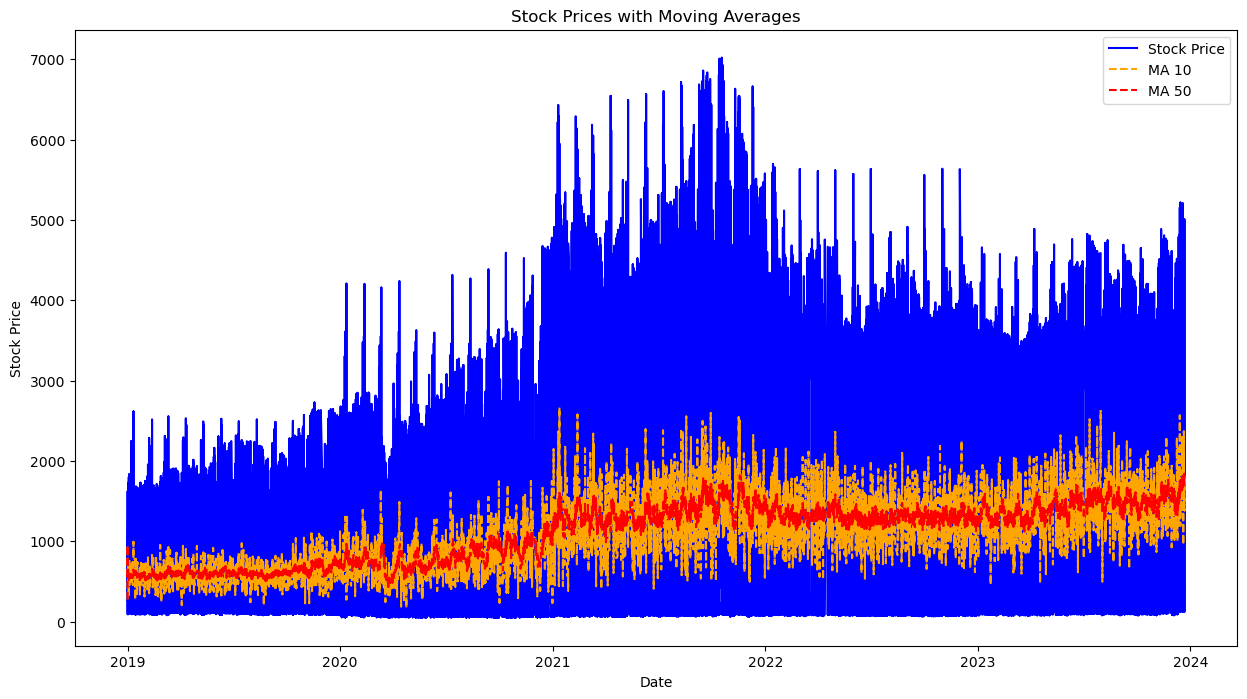

In [29]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2.sort_values(by='DATE')

# Calculate Simple Moving Averages (SMA) for 10 and 50 days
df2['MA_10'] = df2['PRICE'].rolling(window=10, min_periods=1).mean()
df2['MA_50'] = df2['PRICE'].rolling(window=50, min_periods=1).mean()

# Plot the stock prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(df2['DATE'], df2['PRICE'], label='Stock Price', color='blue')
plt.plot(df2['DATE'], df2['MA_10'], label='MA 10', linestyle='--', color='orange')
plt.plot(df2['DATE'], df2['MA_50'], label='MA 50', linestyle='--', color='red')

plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [30]:
df_niftyfifty = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Nifty 50')
df_niftyfifty 

,Nifty,Date,Price,Open,High,Low,Volume,Chg%
0,Nifty 50,2023-12-20,21150.15,21543.50,21593.00,21087.35,363.89,-0.0141
1,Nifty 50,2023-12-19,21453.10,21477.65,21505.05,21337.75,249.75,0.0016
2,Nifty 50,2023-12-18,21418.65,21434.80,21482.80,21365.35,249.67,-0.0018
3,Nifty 50,2023-12-15,21456.65,21287.45,21492.30,21235.30,508.76,0.0129
4,Nifty 50,2023-12-14,21182.70,21110.40,21210.90,21074.45,334.41,0.0123
...,...,...,...,...,...,...,...,...
1228,Nifty 50,2019-01-07,10771.80,10804.85,10835.95,10750.15,269.37,0.0041
1229,Nifty 50,2019-01-04,10727.35,10699.70,10741.05,10628.65,296.60,0.0052
1230,Nifty 50,2019-01-03,10672.25,10796.80,10814.05,10661.25,286.24,-0.0111
1231,Nifty 50,2019-01-02,10792.50,10868.85,10895.35,10735.05,309.67,-0.0108


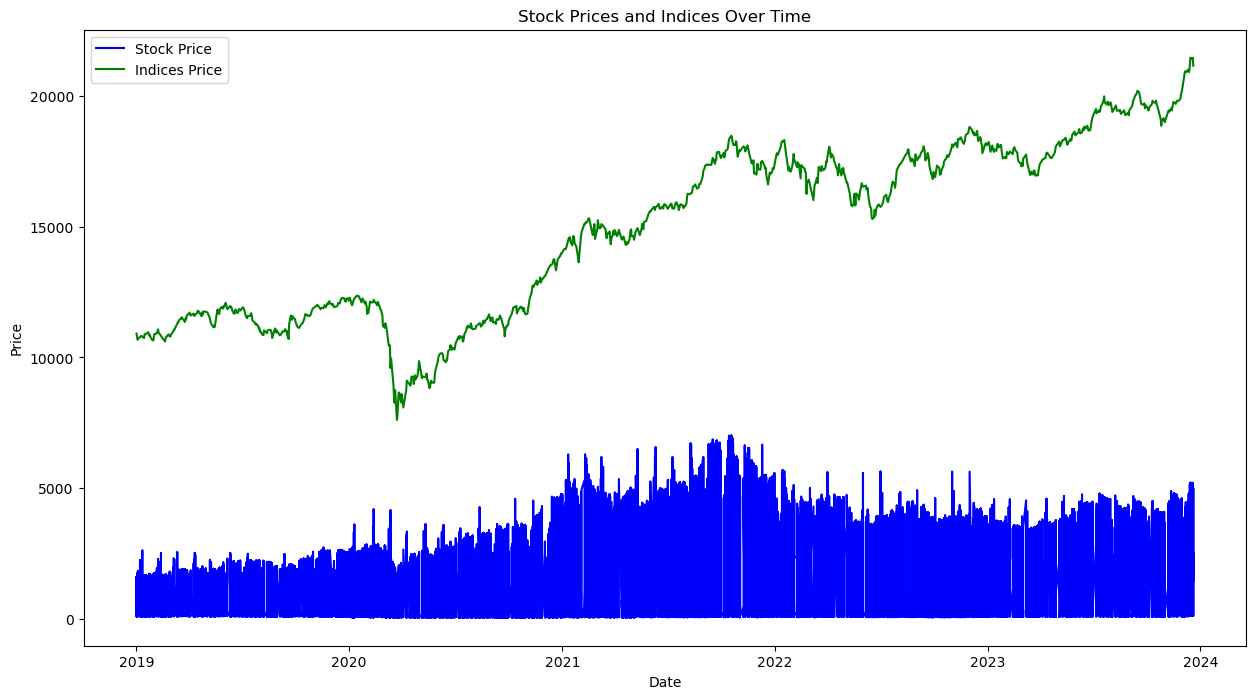

In [31]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df_niftyfifty['DATE'] = pd.to_datetime(df_niftyfifty['Date'])

# Merge the two DataFrames based on the 'DATE' column
merged_df = pd.merge(df2, df_niftyfifty, on='DATE', how='inner', suffixes=('_stock', '_indices'))

# Plot stock prices and indices over time
plt.figure(figsize=(15, 8))
plt.plot(merged_df['DATE'], merged_df['PRICE'], label='Stock Price', color='blue')
plt.plot(merged_df['DATE'], merged_df['Price'], label='Indices Price', color='green')

plt.title('Stock Prices and Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Company
Adani Green Ene    0.131193
BPCL               0.089727
Bharat Dynamics    0.131090
CDSL               0.133597
CRISIL             0.088092
HINDPETRO          0.095912
IOC                0.088212
Indiamart Inter    0.150152
Info Edge          0.096932
ONGC               0.104945
Oil India          0.115310
Reliance           0.080683
Name: Daily_Return, dtype: float64


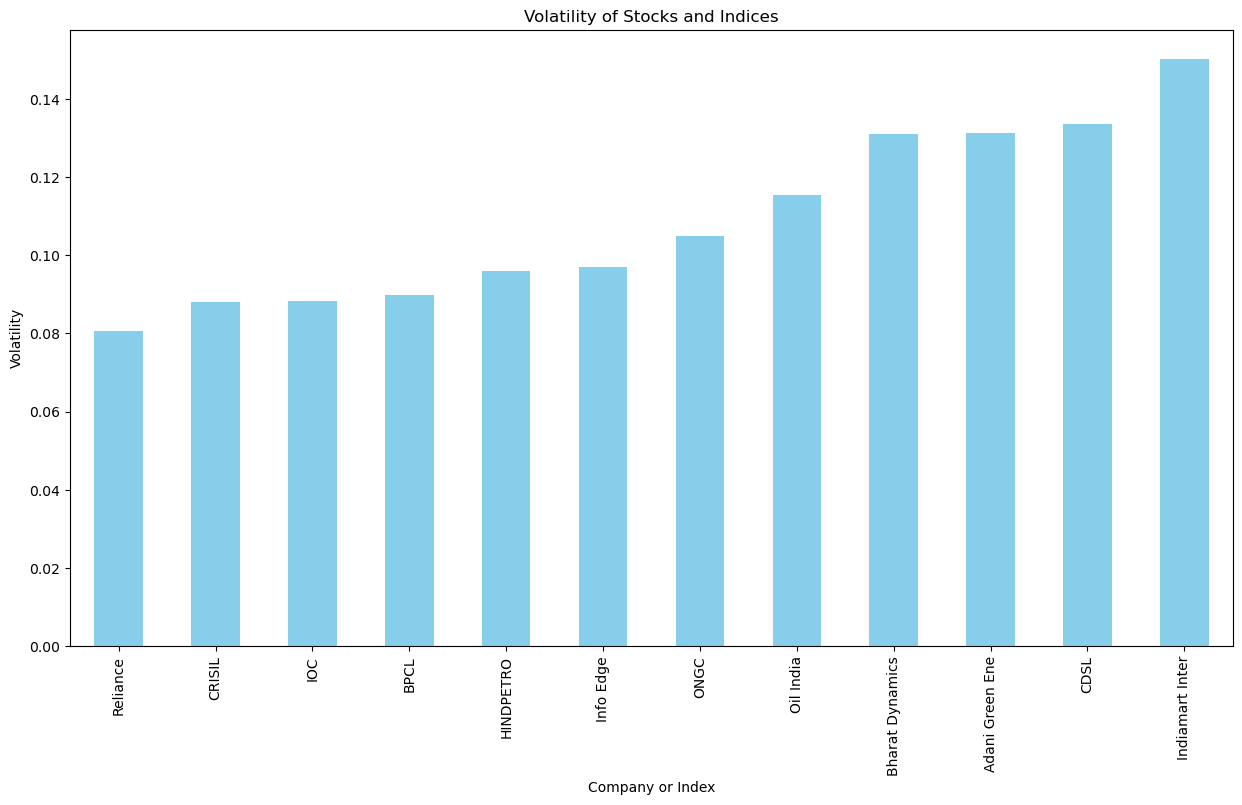

In [32]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Analyze volatility
print(volatility_df)

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')
plt.show()


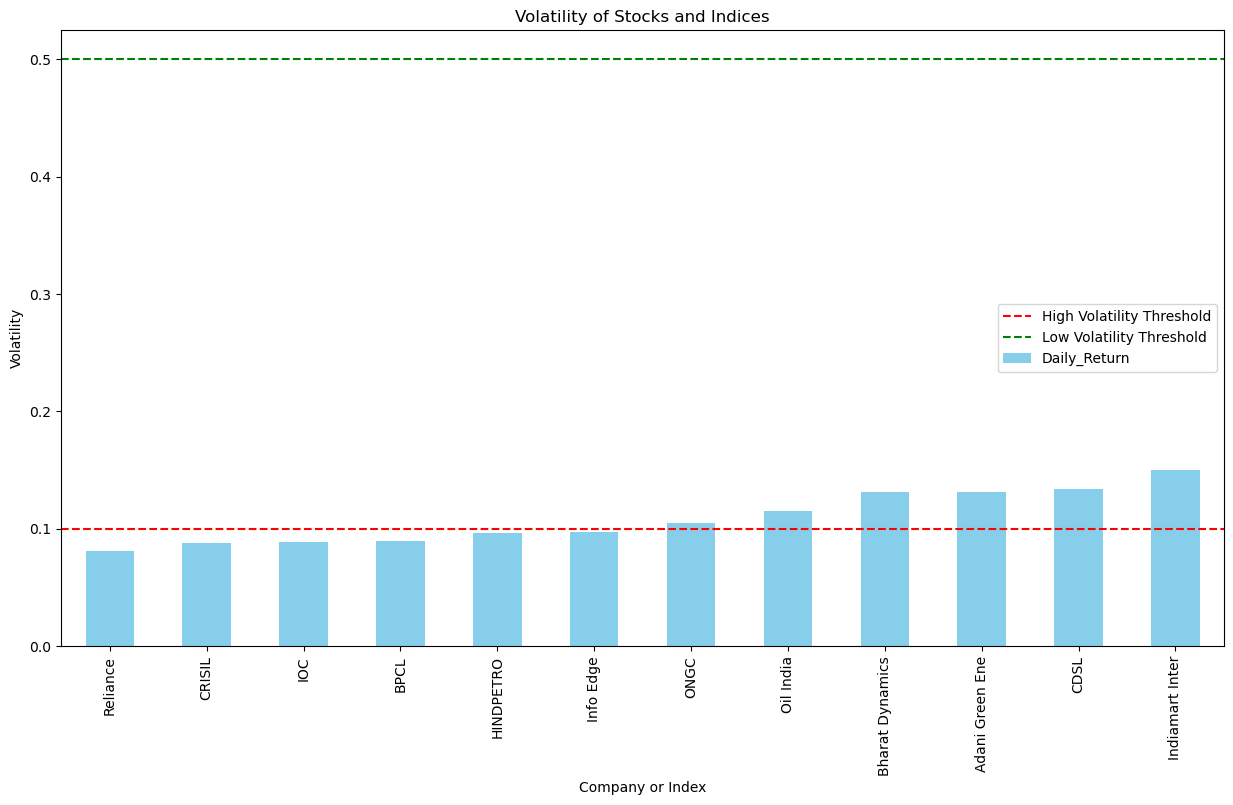

High Volatility Periods: Index(['Adani Green Ene', 'Bharat Dynamics', 'CDSL', 'Indiamart Inter', 'ONGC',
       'Oil India'],
      dtype='object', name='Company')
Low Volatility Periods: Index(['Adani Green Ene', 'BPCL', 'Bharat Dynamics', 'CDSL', 'CRISIL',
       'HINDPETRO', 'IOC', 'Indiamart Inter', 'Info Edge', 'ONGC', 'Oil India',
       'Reliance'],
      dtype='object', name='Company')


In [33]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Set thresholds for high and low volatility
high_volatility_threshold = 0.1  # Adjust the threshold based on your data
low_volatility_threshold = 0.5  # Adjust the threshold based on your data

# Identify periods of high and low volatility
high_volatility_periods = volatility_df[volatility_df > high_volatility_threshold].index
low_volatility_periods = volatility_df[volatility_df < low_volatility_threshold].index

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')

# Highlight high and low volatility periods
plt.axhline(y=high_volatility_threshold, color='red', linestyle='--', label='High Volatility Threshold')
plt.axhline(y=low_volatility_threshold, color='green', linestyle='--', label='Low Volatility Threshold')

plt.legend()
plt.show()

# Print periods of high and low volatility
print(f'High Volatility Periods: {high_volatility_periods}')
print(f'Low Volatility Periods: {low_volatility_periods}')
